<a href="https://colab.research.google.com/github/aesnin12/CSMODELProject/blob/main/CSModel_Machine_Project_Game_Success_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Description

### Analyzing game success criteria using [Video Game Sales and Ratings ](https://www.kaggle.com/datasets/kendallgillies/video-game-sales-and-ratings?resource=download)

##### This study uses the Video Game Sales and Ratings Dataset by VGChartz, which contains information on over 12,080 games. Each record represents a single game and includes data such as title, release date, price, user reviews, playtime statistics, and developer or publisher details. The dataset enables analysis of what factors contribute to a game’s success in terms of ownership, playtime, and ratings.

##### The data collection process of this dataset was used with the Steam Web API and SteamSpy, with data collected through a custom scraper that retrieved all publicly available game metadata. Only official games (not DLCs or apps) were included. Implications are applied such as

*   Data reflects publicly available information, so metrics like ownership are estimates.
*   The dataset represents a snapshot in time, and values such as reviews and playtime may change.
*   Some variables contain missing or inconsistent values, which must be handled carefully to ensure fair comparisons.

##### The dataset structure is stored as a CSV file which describes row as a singl Steam game and column as specific attribute or variable (e.g., price, owners, playtime, rating)

### Variable Descriptions of the dataset

| Variable | Description |
|-----------|-------------|
| Variable          | Description                                               |
| ----------------- | --------------------------------------------------------- |
| `Name`            | Title of the video game                                   |
| `Platform`        | The gaming platform (e.g. Wii, NES, PS4)                  |
| `Year_of_Release` | Year when the game was released                           |
| `Genre`           | Genre (category) of the game (e.g. Sports, Racing)        |
| `Publisher`       | Company that published the game                           |
| `NA_Sales`        | Sales in North America (in millions of units)             |
| `EU_Sales`        | Sales in Europe (in millions of units)                    |
| `JP_Sales`        | Sales in Japan (in millions of units)                     |
| `Other_Sales`     | Sales in the rest of the world (in millions of units)     |
| `Global_Sales`    | Total worldwide sales (in millions of units)              |
| `Critic_Score`    | Average critic review score (typically 0–100)             |
| `Critic_Count`    | Number of critic reviews used to compute the critic score |
| `User_Score`      | Average user review score (typically on a 0–10 scale)     |
| `User_Count`      | Number of user reviews used to compute the user score     |
| `Developer`       | Studio or company that developed the game                 |
| `Rating`          | Age/content rating (e.g. ESRB ratings: E, T, M, etc.)     |

## Dataset Cleaning



In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("kendallgillies/video-game-sales-and-ratings")

print("Path to dataset files:", path)

df = pd.read_csv(os.path.join(path, "Video_Game_Sales_as_of_Jan_2017.csv"))
df.head()

Using Colab cache for faster access to the 'video-game-sales-and-ratings' dataset.
Path to dataset files: /kaggle/input/video-game-sales-and-ratings


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [108]:
df.shape[0]

17416

In [109]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')
df['Year_of_Release'] = pd.to_numeric(df['Year_of_Release'], errors='coerce')

df = df.dropna(subset=['Global_Sales', 'Critic_Score', 'User_Score', 'Year_of_Release'])


In [110]:
df.isnull().sum()

,0
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [111]:
df.shape[0]

7191

In [112]:
platform_counts = df["Platform"].value_counts(dropna=False)
print(platform_counts)

Platform
PS2     1169
X360     892
PS3      797
PC       779
X        587
Wii      494
DS       473
PSP      401
GC       363
PS4      265
GBA      249
XOne     175
3DS      162
PS       157
PSV      125
WiiU      89
DC        14
Name: count, dtype: int64


##### Make platforms in each perspective company (Playstation, Xbox, Nintendo, PC, or Other)

In [113]:
platform_groups = {
    "PlayStation": ["PS", "PS2", "PS3", "PS4", "PSP", "PSV"],
    "Xbox": ["X", "X360", "XONE"],
    "Nintendo": ["NES", "SNES", "N64", "GC", "WII", "WIIU", "GBA", "DS", "3DS", "G"],  # G = Game Boy
    "PC": ["PC"],
    "Sega": ["GEN", "SAT", "DC", "SCD", "GG"],
    "Atari": ["2600"],
    "NEC": ["TG16", "PCFX"],
    "SNK": ["NG"],
    "Bandai": ["WS"],
    "Panasonic": ["3DO"],
}

# Clean and standardize platform names
df["Platform"] = df["Platform"].astype(str).str.strip().str.upper()

# Function to categorize each platform
def categorize_platform(p):
    for group, names in platform_groups.items():
        if p in names:
            return group
    return "Other"

# Apply the grouping and overwrite the column
df["Platform"] = df["Platform"].apply(categorize_platform)

##### Replace RP (Rating Pending) to just none.

In [114]:
df['Rating'].replace('RP', 'No Rating', inplace=True)
df['Rating'].fillna('No Rating', inplace=True)

/tmp/ipython-input-127132537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].replace('RP', 'No Rating', inplace=True)
/tmp/ipython-input-127132537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

## Exploratory Data Analysis

##### For EDA, we can specify video game success criteria by two definitions: (1) Sales success, (2) Critical sucess or both. For this we will use the variables (1) Genre (2) Critic and User scores (3) Platforms and (4) Publishers. In this EDA we will more focus on Sales success by correlating them in the said variables.

### EDA Question 1: Which game genres are associated with higher global sales?

In [117]:
genre_sales = df.groupby('Genre')['Global_Sales'].agg(['mean', 'median', 'sum', 'count']).sort_values(by='mean', ascending=False)
genre_sales

,mean,median,sum,count
Genre,,,,
Misc,1.066309,0.380,427.59,401
Shooter,0.930631,0.320,841.29,904
Platform,0.930121,0.345,383.21,412
Sports,0.871648,0.380,862.06,989
Racing,0.798847,0.270,484.90,607
Action,0.724667,0.290,1242.08,1714
Role-Playing,0.689987,0.250,512.66,743
Simulation,0.668082,0.290,212.45,318
Fighting,0.646260,0.330,253.98,393


/tmp/ipython-input-1283359416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_sales.reset_index(), x='Genre', y='mean', palette='viridis')


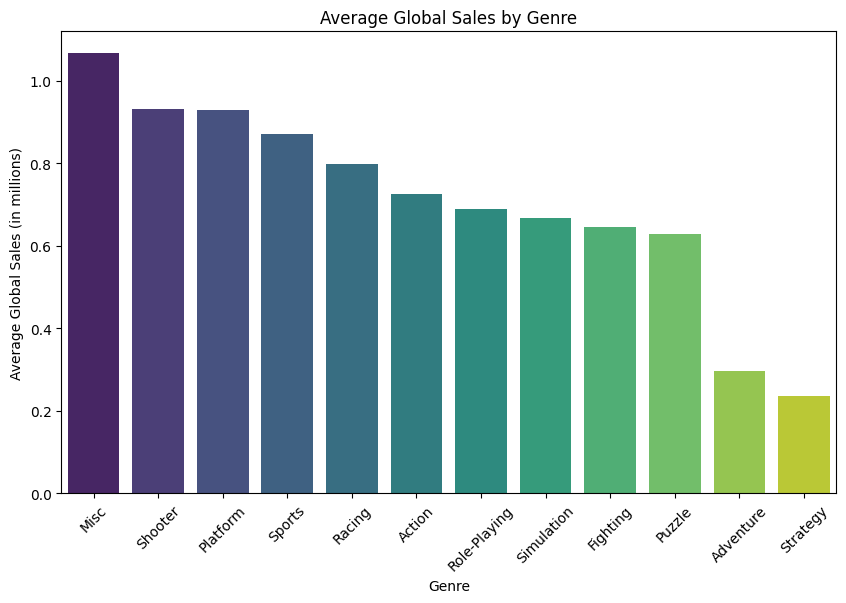

In [121]:
plt.figure(figsize=(10,6))
sns.barplot(data=genre_sales.reset_index(), x='Genre', y='mean', palette='viridis')
plt.title('Average Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

###### Excluding the `Miscellaneous` genre, the data reveals that `Shooter` games have the highest average global sales among all video game genres. This indicates that shooter titles tend to perform exceptionally well in the global market compared to other genres such as `Platform`, `Sports`, or `Racing` games. The popularity of `Shooter` games may be attributed to their broad appeal, competitive gameplay, and strong player engagement across different regions. Overall, this suggests that the shooter genre holds a dominant position in terms of commercial success within the gaming industry.

### EDA Question 2: How do critic and user scores relate to global sales?

In [122]:
df[['Critic_Score', 'User_Score', 'Global_Sales']].corr()

,Critic_Score,User_Score,Global_Sales
Critic_Score,1.000000,0.582705,0.236805
User_Score,0.582705,1.000000,0.088211
Global_Sales,0.236805,0.088211,1.000000


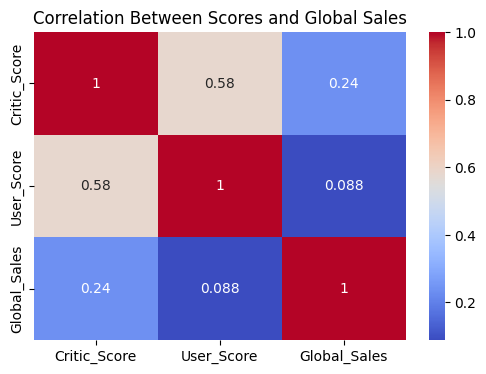

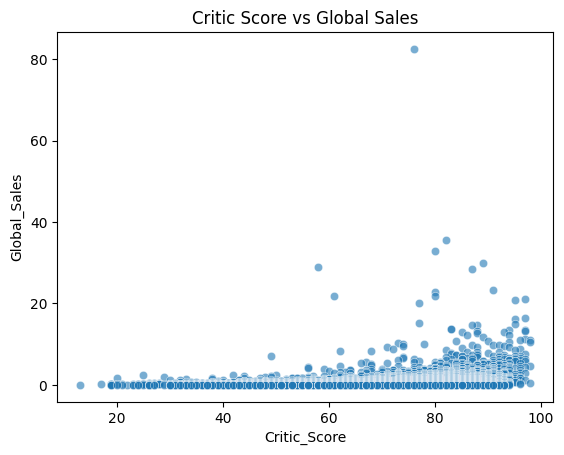

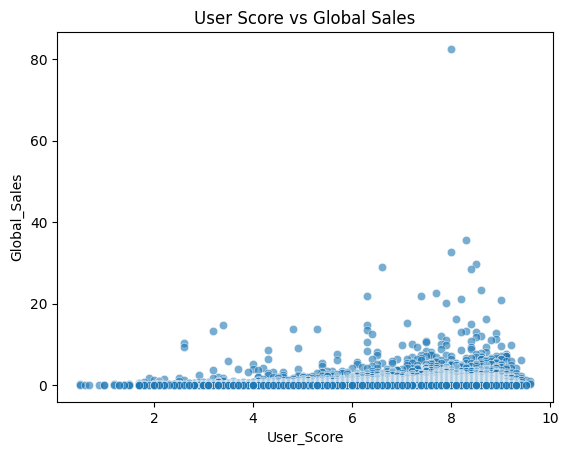

In [123]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Critic_Score', 'User_Score', 'Global_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores and Global Sales')
plt.show()

sns.scatterplot(data=df, x='Critic_Score', y='Global_Sales', alpha=0.6)
plt.title('Critic Score vs Global Sales')
plt.show()

sns.scatterplot(data=df, x='User_Score', y='Global_Sales', alpha=0.6)
plt.title('User Score vs Global Sales')
plt.show()

##### The correlation heatmap and scatter plots show that there is a weak positive correlation (r = 0.24) between `Critic_Score` and `Global_Sales`. This suggests that while games with higher critic ratings tend to sell slightly better worldwide, the relationship is not particularly strong. In other words, although positive critic reviews may contribute to improved sales, they are not the sole determinant of a game's commercial success.

##### In contrast, the correlation between `User_Score` and `Global_Sales` is even weaker (r = 0.09), indicating that player ratings have minimal direct influence on overall sales performance. This could imply that user opinions, while valuable for community perception, do not necessarily translate into higher revenue.

##### Overall, the findings suggest that well-reviewed games (especially by critics) often achieve higher sales, but a good review alone does not guarantee commercial success — other factors such as marketing, franchise reputation, platform exclusivity, and release timing may play more substantial roles in driving sales.

### EDA Question 3: Which gaming platforms tend to have higher-selling games?

In [124]:
platform_sales = df.groupby('Platform')['Global_Sales'].agg(['mean', 'median', 'sum', 'count']).sort_values(by='mean', ascending=False)
platform_sales

,mean,median,sum,count
Platform,,,,
Nintendo,0.851705,0.280,1558.62,1830
PlayStation,0.845528,0.370,2463.87,2914
Xbox,0.743065,0.295,1229.03,1654
Sega,0.325000,0.195,4.55,14
PC,0.255212,0.050,198.81,779


/tmp/ipython-input-3294420829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_sales.reset_index(), x='Platform', y='mean', palette='magma')


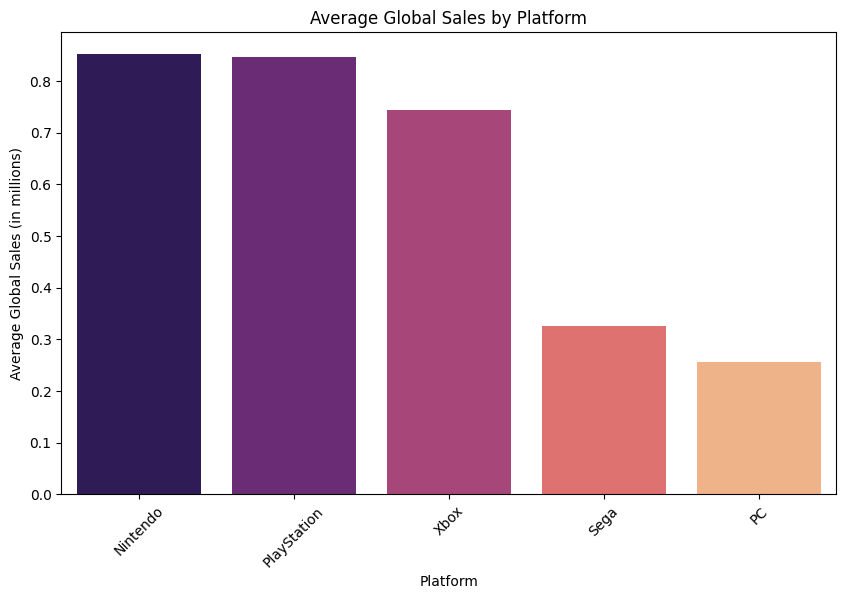

In [125]:
plt.figure(figsize=(10,6))
sns.barplot(data=platform_sales.reset_index(), x='Platform', y='mean', palette='magma')
plt.title('Average Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

#### The analysis shows an extremely close competition between `Nintendo` and `PlayStation`. Nintendo leads with an average of 0.852 million units sold per game, while `PlayStation` follows closely at 0.846 million units. This tiny gap suggests that both platforms have been almost equally successful in driving game sales, with `Nintendo` holding only a slight edge in overall performance.

### EDA Question 4: Who are the top publishers in terms of global sales performance?

In [126]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].agg(['mean', 'sum', 'count']).sort_values(by='sum', ascending=False).head(10)
publisher_sales

,mean,sum,count
Publisher,,,
Electronic Arts,0.924095,898.22,972
Nintendo,2.877433,863.23,300
Activision,1.074384,549.01,511
Sony Computer Entertainment,1.220741,395.52,324
Take-Two Interactive,1.261454,355.73,282
Ubisoft,0.672471,348.34,518
Microsoft Game Studios,1.512069,219.25,145
THQ,0.526006,164.64,313
Sega,0.508904,153.18,301


/tmp/ipython-input-11898410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=publisher_sales.reset_index(), x='Publisher', y='sum', palette='cubehelix')


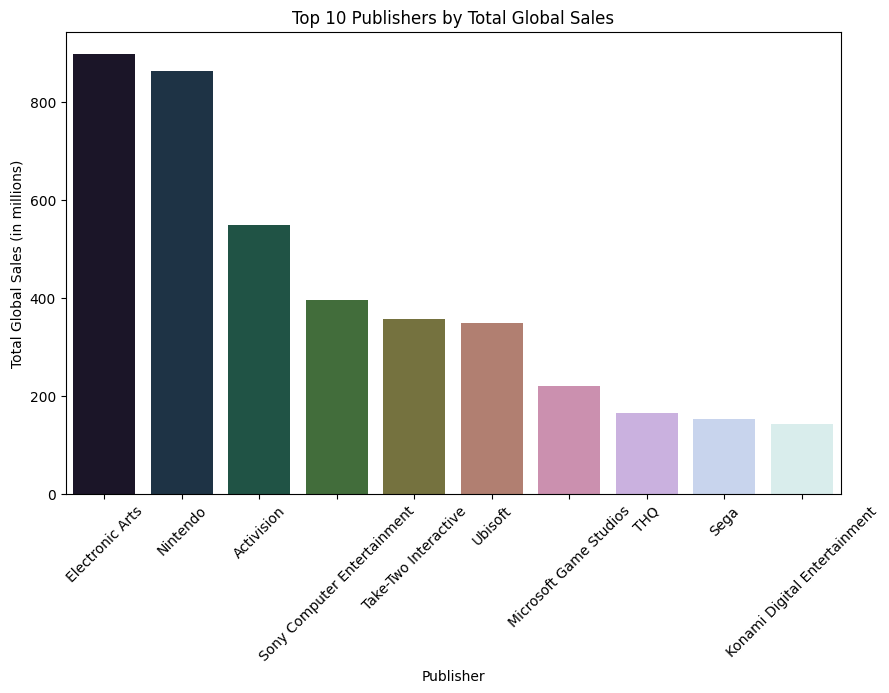

In [127]:
plt.figure(figsize=(10,6))
sns.barplot(data=publisher_sales.reset_index(), x='Publisher', y='sum', palette='cubehelix')
plt.title('Top 10 Publishers by Total Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()


##### `Electronic Arts` (EA) leads all publishers with the highest total global sales, demonstrating its strong dominance in the gaming industry through successful franchises such as FIFA, Battlefield, and The Sims. Following closely behind is `Nintendo`, whose iconic series like Mario, The Legend of Zelda, and Pokémon continue to drive impressive worldwide sales. Other major publishers, including Activision, Sony Computer Entertainment, Take-Two Interactive, and Ubisoft, also maintain significant market shares but remain behind EA and Nintendo in overall performance. This highlights EA’s position as the top-performing publisher globally in terms of video game sales.



EDA Question	Key Insights
1. In Genre + Sales, tend to generate higher average and total sales.
2. Scores + Sales,	Moderate positive correlation with Critic Scores; weaker with User Scores.
3. Platform + Sales,	Platforms like PlayStation or Nintendo have higher-selling games on average.
4. Publisher + Sales, EA, Nintendo and Activision account for a large share of total global sales.

In [115]:
df.to_csv("Video_Game_Sales_Current.csv", index=False)